Importing the libraries and dataset. Also taking a look at the dataset.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [89]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


We will remove the situation column, the zero risk rows and transform the location into features, as well as the locations with few entries.

In [90]:
slidings = slidings[slidings.risk!=0]
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
959,0,3,3,0,0,0,0,0,0,19.7
961,0,3,2,0,0,0,0,0,0,88.9
962,0,3,2,0,0,0,0,0,0,0.0
964,0,3,3,0,0,0,0,0,1,4.5
965,0,3,2,0,0,0,0,0,1,0.0


In [91]:
slidings['risk'].value_counts()

3    4715
2    1878
4    1017
1     322
Name: risk, dtype: int64

In [92]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 959 to 45894
Data columns (total 10 columns):
situation         7932 non-null int64
location          7932 non-null int64
risk              7932 non-null int64
victims           7932 non-null int64
deadly_victims    7932 non-null int64
length            7932 non-null int64
num_points        7932 non-null int64
in_place          7932 non-null int64
sliding           7932 non-null int64
Rain              7932 non-null float64
dtypes: float64(1), int64(9)
memory usage: 681.7 KB


In [93]:
slidings.sliding.value_counts()

0    4119
1    3813
Name: sliding, dtype: int64

In [94]:
a = slidings.location.value_counts() > 10
np.unique(a, return_counts=True)

(array([False,  True]), array([28, 30]))

In [95]:
slidings = pd.get_dummies(slidings,columns=['location'],drop_first=True)
slidings.head()

,situation,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain,location_5,...,location_89,location_94,location_96,location_99,location_106,location_109,location_114,location_116,location_117,location_118
959,0,3,0,0,0,0,0,0,19.7,0,...,0,0,0,0,0,0,0,0,0,0
961,0,2,0,0,0,0,0,0,88.9,0,...,0,0,0,0,0,0,0,0,0,0
962,0,2,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,3,0,0,0,0,0,1,4.5,0,...,0,0,0,0,0,0,0,0,0,0
965,0,2,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
slidings.columns


Index(['situation', 'risk', 'victims', 'deadly_victims', 'length',
       'num_points', 'in_place', 'sliding', 'Rain', 'location_5', 'location_7',
       'location_8', 'location_9', 'location_10', 'location_11', 'location_12',
       'location_14', 'location_16', 'location_17', 'location_18',
       'location_20', 'location_21', 'location_24', 'location_25',
       'location_28', 'location_31', 'location_33', 'location_35',
       'location_39', 'location_40', 'location_41', 'location_43',
       'location_44', 'location_45', 'location_46', 'location_47',
       'location_48', 'location_49', 'location_50', 'location_55',
       'location_58', 'location_60', 'location_61', 'location_67',
       'location_70', 'location_71', 'location_72', 'location_74',
       'location_76', 'location_77', 'location_78', 'location_79',
       'location_81', 'location_83', 'location_84', 'location_86',
       'location_89', 'location_94', 'location_96', 'location_99',
       'location_106', 'location_109

In [97]:
columns_to_remove = teste.loc[:, teste.sum() > 10]
columns_to_remove_list = columns_to_remove.columns
slidings = slidings.drop(slidings.loc[:,columns_to_remove_list],axis=1)
slidings.head()

,situation,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain,location_5,...,location_61,location_67,location_70,location_72,location_77,location_81,location_83,location_94,location_96,location_118
959,0,3,0,0,0,0,0,0,19.7,0,...,0,0,0,0,0,0,0,0,0,0
961,0,2,0,0,0,0,0,0,88.9,0,...,0,0,0,0,0,0,0,0,0,0
962,0,2,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,3,0,0,0,0,0,1,4.5,0,...,0,0,0,0,0,0,0,0,0,0
965,0,2,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7932 entries, 959 to 45894
Data columns (total 37 columns):
situation         7932 non-null int64
risk              7932 non-null int64
victims           7932 non-null int64
deadly_victims    7932 non-null int64
length            7932 non-null int64
num_points        7932 non-null int64
in_place          7932 non-null int64
sliding           7932 non-null int64
Rain              7932 non-null float64
location_5        7932 non-null uint8
location_8        7932 non-null uint8
location_9        7932 non-null uint8
location_11       7932 non-null uint8
location_12       7932 non-null uint8
location_14       7932 non-null uint8
location_18       7932 non-null uint8
location_20       7932 non-null uint8
location_25       7932 non-null uint8
location_28       7932 non-null uint8
location_33       7932 non-null uint8
location_35       7932 non-null uint8
location_41       7932 non-null uint8
location_43       7932 non-null uint8
location_44   

In [99]:
random_state = 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding','situation'},axis=1)
y= slidings['sliding']

model = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
X.head()

,risk,victims,deadly_victims,length,num_points,in_place,Rain,location_5,location_8,location_9,...,location_61,location_67,location_70,location_72,location_77,location_81,location_83,location_94,location_96,location_118
959,3,0,0,0,0,0,19.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
961,2,0,0,0,0,0,88.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,2,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,3,0,0,0,0,0,4.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,2,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

           0       0.62      0.69      0.65       827
           1       0.61      0.54      0.58       760

    accuracy                           0.62      1587
   macro avg       0.62      0.61      0.61      1587
weighted avg       0.62      0.62      0.61      1587



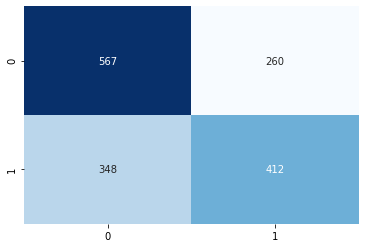

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

The maximum precision for  2  depth found was  0.647  with  75  estimators.
The maximum accuracy for  2  depth found was  0.549  with  95  estimators.

The maximum precision for  3  depth found was  0.652  with  15  estimators.
The maximum accuracy for  3  depth found was  0.549  with  80  estimators.

The maximum precision for  4  depth found was  0.645  with  10  estimators.
The maximum accuracy for  4  depth found was  0.555  with  5  estimators.

The maximum precision for  5  depth found was  0.645  with  10  estimators.
The maximum accuracy for  5  depth found was  0.567  with  20  estimators.

The maximum precision for  6  depth found was  0.647  with  5  estimators.
The maximum accuracy for  6  depth found was  0.569  with  10  estimators.

The maximum precision for  7  depth found was  0.663  with  10  estimators.
The maximum accuracy for  7  depth found was  0.563  with  25  estimators.

The maximum precision for  8  depth found was  0.670  with  70  estimators.
The maximum ac

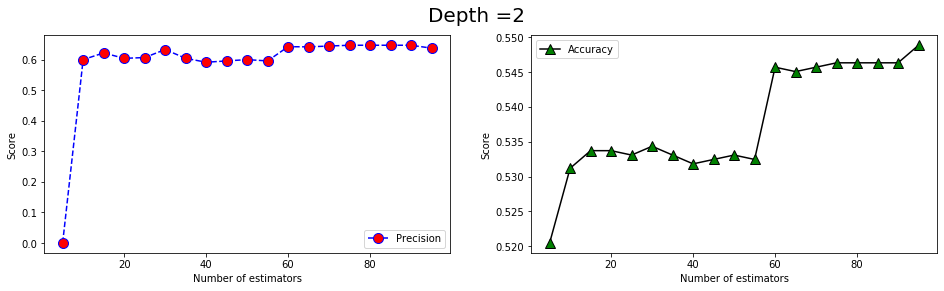

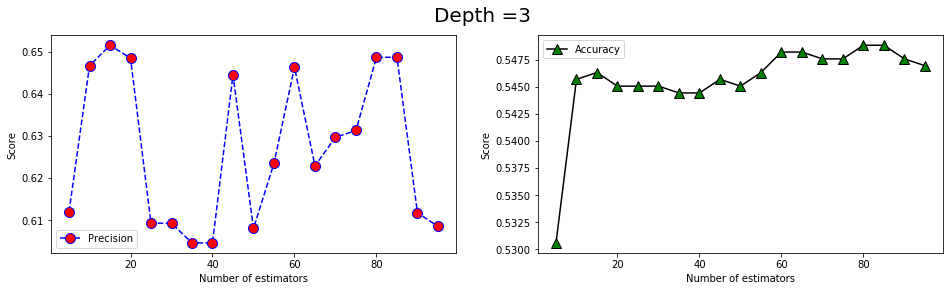

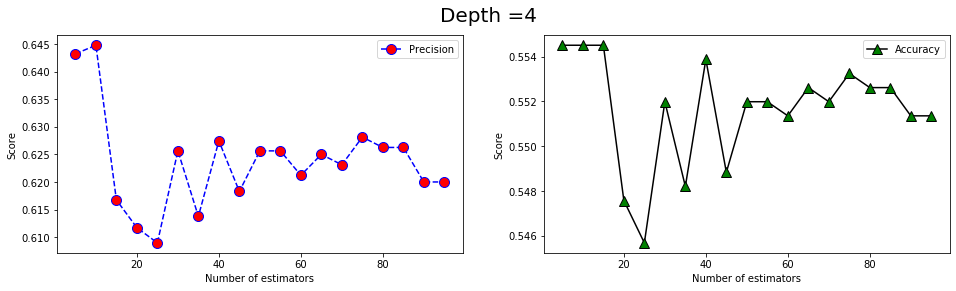

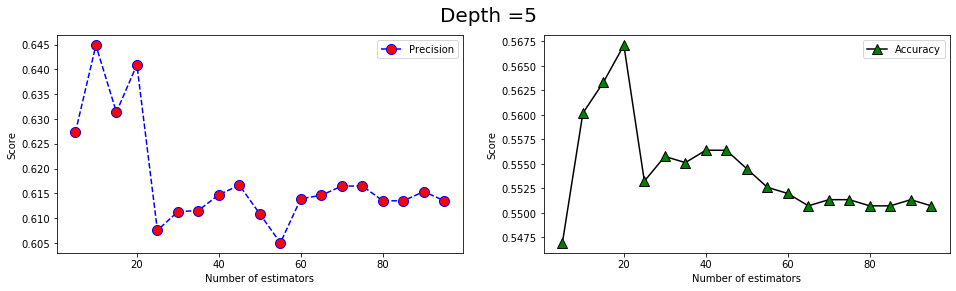

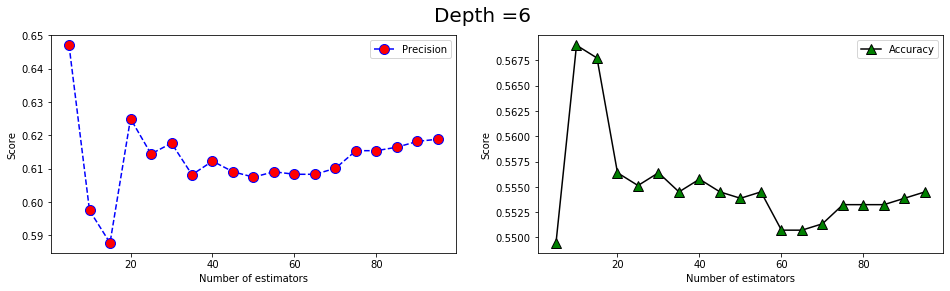

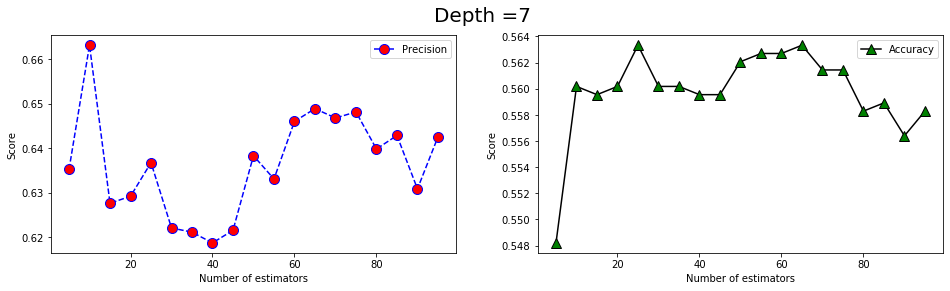

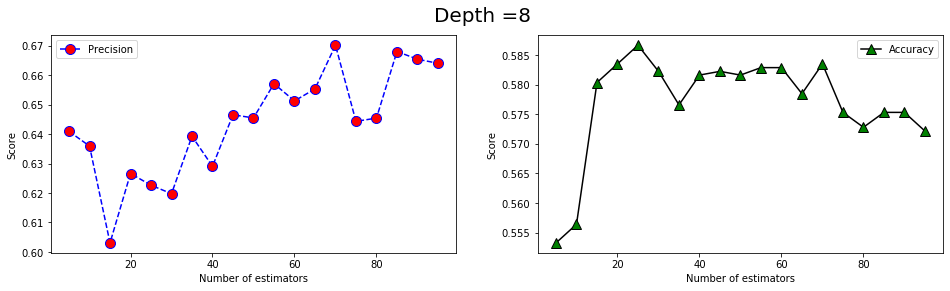

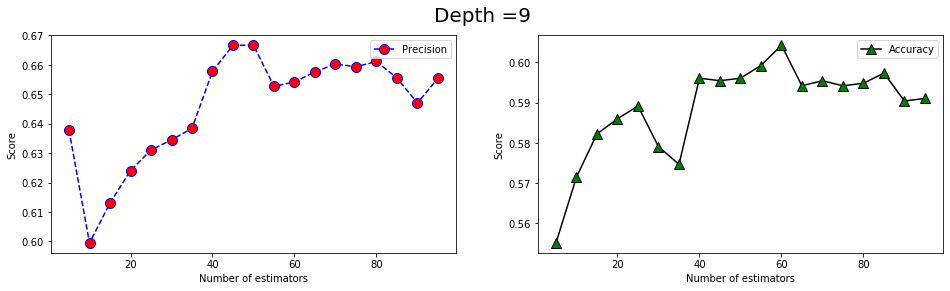

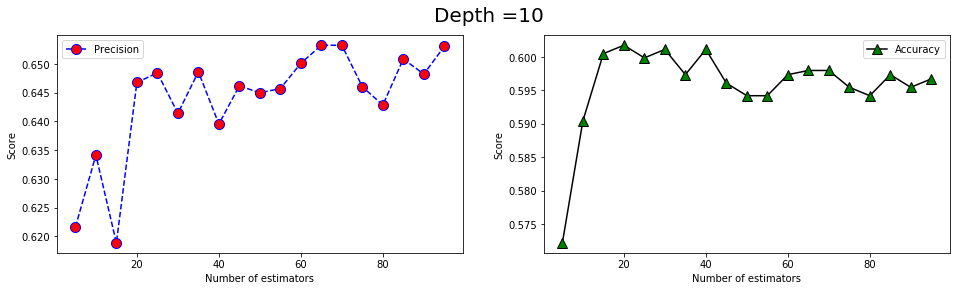

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,11):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        precision.append(precision_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    ax1.legend()
    ax2.legend()
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    

Depth = 9 and estimators = 60 seems to be a reasonable choice, so we will take a more in-depth look with these hyperparameters.

              precision    recall  f1-score   support

           0       0.59      0.82      0.68       827
           1       0.65      0.37      0.47       760

    accuracy                           0.60      1587
   macro avg       0.62      0.59      0.58      1587
weighted avg       0.62      0.60      0.58      1587



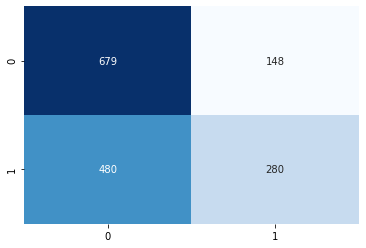

In [103]:
depth = 9
estimators = 60
model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [104]:
model.score(X,y)

0.6071608673726677

In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
scores

array([0.52770781, 0.51763224, 0.50189155, 0.56998739, 0.54602774,
       0.57881463, 0.53467844, 0.47667087, 0.50819672, 0.58638083])

In [106]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.07)


In [107]:
scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([0.51598174, 0.4983165 , 0.42708333, 0.57352941, 0.76923077,
       0.64417178, 0.53      , 0.43560606, 0.48163265, 0.59246575])

In [108]:
print("precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

precision: 0.55 (+/- 0.20)


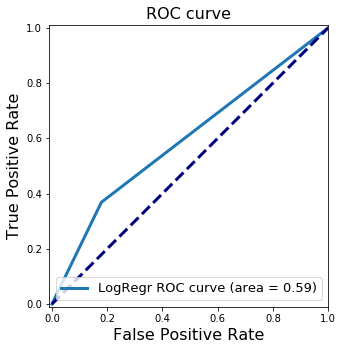

In [109]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [110]:
importances = model.feature_importances_
for i in range(X.shape[1]):
    print( X.columns[i],"%.4f" % importances[i])

risk 0.1072
victims 0.0113
deadly_victims 0.0024
length 0.1622
num_points 0.0302
in_place 0.0137
Rain 0.5593
location_5 0.0031
location_8 0.0069
location_9 0.0107
location_11 0.0056
location_12 0.0000
location_14 0.0011
location_18 0.0000
location_20 0.0019
location_25 0.0209
location_28 0.0063
location_33 0.0000
location_35 0.0024
location_41 0.0016
location_43 0.0000
location_44 0.0000
location_46 0.0034
location_47 0.0067
location_48 0.0029
location_61 0.0049
location_67 0.0026
location_70 0.0024
location_72 0.0087
location_77 0.0063
location_81 0.0047
location_83 0.0010
location_94 0.0017
location_96 0.0028
location_118 0.0052


Removing the locations with entries less than 10 didn't do anything, so what's left to do is a t-SNE analysis of the data.